# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

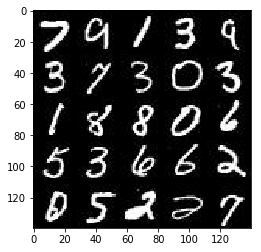

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

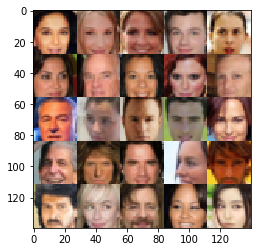

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_inputs = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels),
                                'real_inputs')
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), 'z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return real_inputs, z_inputs, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.2
        
        h1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        h1 = tf.maximum(alpha * h1, h1)
        
        h2 = tf.layers.conv2d(h1, 128, 5, 2, 'same')
        h2 = tf.layers.batch_normalization(h2, training=True)
        h2 = tf.maximum(alpha * h2, h2)
        
        h3 = tf.layers.conv2d(h2, 256, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=True)
        h3 = tf.maximum(alpha * h3, h3)
        
        flat = tf.reshape(h3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
    
        h1 = tf.layers.dense(z, 2*2*512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
    
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
    
        h3 = tf.layers.conv2d_transpose(h2, 128, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
    
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [19]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    smooth = 0.1
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)
))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [20]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [22]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    _, img_width, img_height, img_channels = data_shape
    
    real_input, z_input, lr = model_inputs(
        img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    losses = []
    n_images = 25
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 0.9, (batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={
                        real_input: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        z_input: z_sample, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.6186... Generator Loss: 1.6042
Epoch 1/2... Discriminator Loss: 0.5363... Generator Loss: 5.9364
Epoch 1/2... Discriminator Loss: 0.4836... Generator Loss: 4.5329
Epoch 1/2... Discriminator Loss: 0.9027... Generator Loss: 11.7707
Epoch 1/2... Discriminator Loss: 0.4421... Generator Loss: 6.2538
Epoch 1/2... Discriminator Loss: 0.5190... Generator Loss: 5.2881
Epoch 1/2... Discriminator Loss: 1.3972... Generator Loss: 0.5145
Epoch 1/2... Discriminator Loss: 1.1685... Generator Loss: 0.6994
Epoch 1/2... Discriminator Loss: 0.5434... Generator Loss: 3.2876
Epoch 1/2... Discriminator Loss: 0.8461... Generator Loss: 1.4496


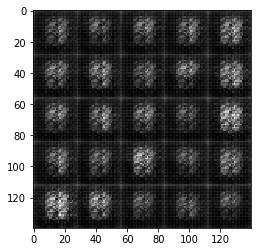

Epoch 1/2... Discriminator Loss: 0.6296... Generator Loss: 2.5429
Epoch 1/2... Discriminator Loss: 0.5922... Generator Loss: 2.4367
Epoch 1/2... Discriminator Loss: 0.4630... Generator Loss: 4.0444
Epoch 1/2... Discriminator Loss: 0.4633... Generator Loss: 3.1738
Epoch 1/2... Discriminator Loss: 0.4995... Generator Loss: 2.5045
Epoch 1/2... Discriminator Loss: 0.4912... Generator Loss: 3.0047
Epoch 1/2... Discriminator Loss: 0.4523... Generator Loss: 2.7904
Epoch 1/2... Discriminator Loss: 0.4142... Generator Loss: 3.5054
Epoch 1/2... Discriminator Loss: 0.4117... Generator Loss: 3.3345
Epoch 1/2... Discriminator Loss: 0.4208... Generator Loss: 3.2937


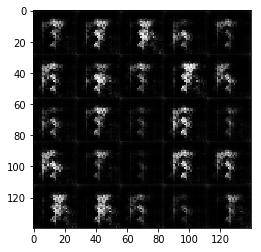

Epoch 1/2... Discriminator Loss: 0.4735... Generator Loss: 3.0143
Epoch 1/2... Discriminator Loss: 0.4780... Generator Loss: 2.8540
Epoch 1/2... Discriminator Loss: 0.4140... Generator Loss: 4.2585
Epoch 1/2... Discriminator Loss: 0.4780... Generator Loss: 3.2152
Epoch 1/2... Discriminator Loss: 0.5517... Generator Loss: 2.0747
Epoch 1/2... Discriminator Loss: 0.6457... Generator Loss: 1.6353
Epoch 1/2... Discriminator Loss: 0.5649... Generator Loss: 5.4593
Epoch 1/2... Discriminator Loss: 0.5233... Generator Loss: 2.1618
Epoch 1/2... Discriminator Loss: 0.4540... Generator Loss: 3.7611
Epoch 1/2... Discriminator Loss: 0.6983... Generator Loss: 5.4189


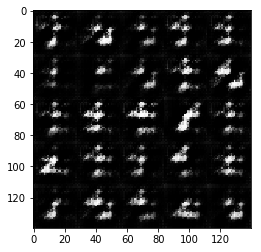

Epoch 1/2... Discriminator Loss: 0.5232... Generator Loss: 2.3310
Epoch 1/2... Discriminator Loss: 0.7112... Generator Loss: 1.6255
Epoch 1/2... Discriminator Loss: 0.5520... Generator Loss: 2.1301
Epoch 1/2... Discriminator Loss: 0.5250... Generator Loss: 3.2293
Epoch 1/2... Discriminator Loss: 0.5236... Generator Loss: 2.5926
Epoch 1/2... Discriminator Loss: 0.6139... Generator Loss: 4.4763
Epoch 1/2... Discriminator Loss: 0.5668... Generator Loss: 3.2673
Epoch 1/2... Discriminator Loss: 0.4794... Generator Loss: 3.6420
Epoch 1/2... Discriminator Loss: 0.7394... Generator Loss: 1.5693
Epoch 1/2... Discriminator Loss: 0.5794... Generator Loss: 2.6949


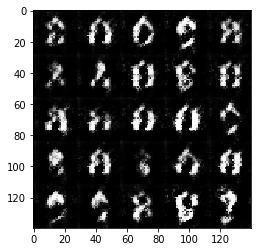

Epoch 1/2... Discriminator Loss: 0.5937... Generator Loss: 2.0631
Epoch 1/2... Discriminator Loss: 0.5190... Generator Loss: 2.8485
Epoch 1/2... Discriminator Loss: 0.5877... Generator Loss: 2.7273
Epoch 1/2... Discriminator Loss: 0.6461... Generator Loss: 4.1213
Epoch 1/2... Discriminator Loss: 0.6236... Generator Loss: 2.9928
Epoch 1/2... Discriminator Loss: 0.6077... Generator Loss: 1.9954
Epoch 1/2... Discriminator Loss: 0.6096... Generator Loss: 3.0583
Epoch 1/2... Discriminator Loss: 0.5058... Generator Loss: 2.3949
Epoch 1/2... Discriminator Loss: 0.5067... Generator Loss: 2.5961
Epoch 1/2... Discriminator Loss: 0.6536... Generator Loss: 1.8573


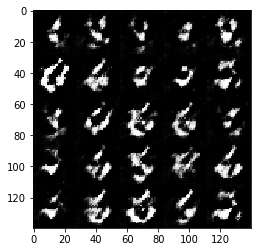

Epoch 1/2... Discriminator Loss: 0.5437... Generator Loss: 3.3954
Epoch 1/2... Discriminator Loss: 0.6597... Generator Loss: 2.7193
Epoch 1/2... Discriminator Loss: 0.8402... Generator Loss: 3.8859
Epoch 1/2... Discriminator Loss: 0.8776... Generator Loss: 1.3615
Epoch 1/2... Discriminator Loss: 0.6544... Generator Loss: 1.9292
Epoch 1/2... Discriminator Loss: 0.7064... Generator Loss: 2.7858
Epoch 1/2... Discriminator Loss: 0.7237... Generator Loss: 2.0001
Epoch 1/2... Discriminator Loss: 0.6977... Generator Loss: 2.2176
Epoch 1/2... Discriminator Loss: 0.6731... Generator Loss: 2.2492
Epoch 1/2... Discriminator Loss: 1.4576... Generator Loss: 0.6375


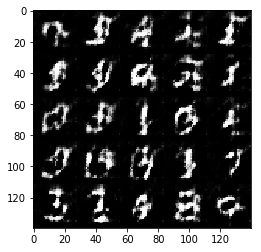

Epoch 1/2... Discriminator Loss: 0.6596... Generator Loss: 2.2291
Epoch 1/2... Discriminator Loss: 0.8051... Generator Loss: 2.0589
Epoch 1/2... Discriminator Loss: 0.8681... Generator Loss: 1.4235
Epoch 1/2... Discriminator Loss: 0.8635... Generator Loss: 2.1046
Epoch 1/2... Discriminator Loss: 0.7659... Generator Loss: 2.5137
Epoch 1/2... Discriminator Loss: 0.7541... Generator Loss: 2.0132
Epoch 1/2... Discriminator Loss: 0.6668... Generator Loss: 2.0243
Epoch 1/2... Discriminator Loss: 0.7005... Generator Loss: 3.1069
Epoch 1/2... Discriminator Loss: 0.7435... Generator Loss: 1.4608
Epoch 1/2... Discriminator Loss: 0.8611... Generator Loss: 2.6604


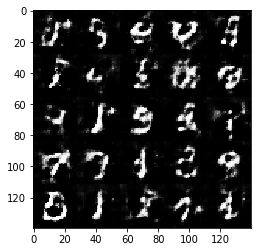

Epoch 1/2... Discriminator Loss: 0.8277... Generator Loss: 2.1894
Epoch 1/2... Discriminator Loss: 0.7795... Generator Loss: 1.8556
Epoch 1/2... Discriminator Loss: 0.8151... Generator Loss: 1.2430
Epoch 1/2... Discriminator Loss: 0.6928... Generator Loss: 2.2763
Epoch 1/2... Discriminator Loss: 0.7531... Generator Loss: 2.7693
Epoch 1/2... Discriminator Loss: 0.7223... Generator Loss: 2.4076
Epoch 1/2... Discriminator Loss: 0.7157... Generator Loss: 1.7045
Epoch 1/2... Discriminator Loss: 0.8721... Generator Loss: 2.1919
Epoch 1/2... Discriminator Loss: 0.8430... Generator Loss: 1.3238
Epoch 1/2... Discriminator Loss: 0.9017... Generator Loss: 1.1321


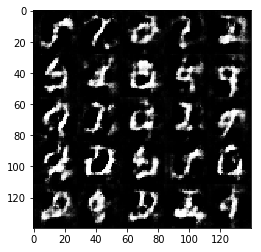

Epoch 1/2... Discriminator Loss: 0.9420... Generator Loss: 3.4967
Epoch 1/2... Discriminator Loss: 0.8697... Generator Loss: 1.2284
Epoch 1/2... Discriminator Loss: 0.6967... Generator Loss: 2.3855
Epoch 1/2... Discriminator Loss: 0.7885... Generator Loss: 2.0985
Epoch 1/2... Discriminator Loss: 0.7760... Generator Loss: 2.2224
Epoch 1/2... Discriminator Loss: 1.6561... Generator Loss: 3.6632
Epoch 1/2... Discriminator Loss: 0.8241... Generator Loss: 1.3824
Epoch 1/2... Discriminator Loss: 1.0121... Generator Loss: 2.5588
Epoch 1/2... Discriminator Loss: 0.7257... Generator Loss: 2.1619
Epoch 1/2... Discriminator Loss: 1.1068... Generator Loss: 0.8216


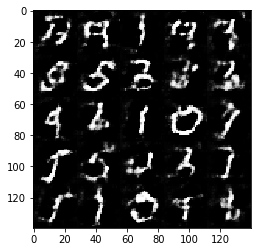

Epoch 1/2... Discriminator Loss: 0.9620... Generator Loss: 1.0177
Epoch 1/2... Discriminator Loss: 0.7029... Generator Loss: 1.8007
Epoch 1/2... Discriminator Loss: 0.8263... Generator Loss: 1.6549
Epoch 2/2... Discriminator Loss: 0.7528... Generator Loss: 1.5955
Epoch 2/2... Discriminator Loss: 0.7518... Generator Loss: 1.7140
Epoch 2/2... Discriminator Loss: 0.7703... Generator Loss: 2.1316
Epoch 2/2... Discriminator Loss: 0.6954... Generator Loss: 1.9248
Epoch 2/2... Discriminator Loss: 0.7218... Generator Loss: 1.6775
Epoch 2/2... Discriminator Loss: 0.8607... Generator Loss: 1.4173
Epoch 2/2... Discriminator Loss: 0.8520... Generator Loss: 1.5848


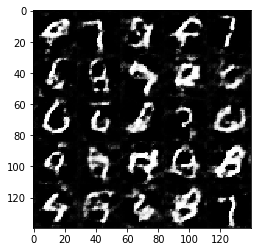

Epoch 2/2... Discriminator Loss: 0.8591... Generator Loss: 2.1059
Epoch 2/2... Discriminator Loss: 0.7728... Generator Loss: 1.9666
Epoch 2/2... Discriminator Loss: 1.0926... Generator Loss: 0.8335
Epoch 2/2... Discriminator Loss: 0.8698... Generator Loss: 1.6083
Epoch 2/2... Discriminator Loss: 0.8513... Generator Loss: 1.1879
Epoch 2/2... Discriminator Loss: 0.9913... Generator Loss: 0.9200
Epoch 2/2... Discriminator Loss: 0.8362... Generator Loss: 1.3821
Epoch 2/2... Discriminator Loss: 0.8919... Generator Loss: 1.0501
Epoch 2/2... Discriminator Loss: 1.0294... Generator Loss: 2.3515
Epoch 2/2... Discriminator Loss: 1.2818... Generator Loss: 0.6616


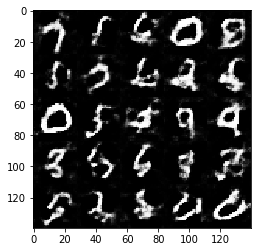

Epoch 2/2... Discriminator Loss: 0.8403... Generator Loss: 1.4134
Epoch 2/2... Discriminator Loss: 1.0088... Generator Loss: 0.9081
Epoch 2/2... Discriminator Loss: 0.8483... Generator Loss: 1.3600
Epoch 2/2... Discriminator Loss: 0.7949... Generator Loss: 1.2993
Epoch 2/2... Discriminator Loss: 1.3235... Generator Loss: 0.5849
Epoch 2/2... Discriminator Loss: 0.8379... Generator Loss: 1.2833
Epoch 2/2... Discriminator Loss: 0.7823... Generator Loss: 1.8946
Epoch 2/2... Discriminator Loss: 0.9302... Generator Loss: 1.7819
Epoch 2/2... Discriminator Loss: 1.0037... Generator Loss: 0.8948
Epoch 2/2... Discriminator Loss: 0.7575... Generator Loss: 1.5083


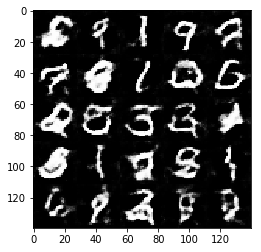

Epoch 2/2... Discriminator Loss: 0.8594... Generator Loss: 1.9281
Epoch 2/2... Discriminator Loss: 0.9091... Generator Loss: 1.1124
Epoch 2/2... Discriminator Loss: 0.9018... Generator Loss: 1.4110
Epoch 2/2... Discriminator Loss: 0.8623... Generator Loss: 1.6012
Epoch 2/2... Discriminator Loss: 0.7964... Generator Loss: 1.5033
Epoch 2/2... Discriminator Loss: 0.7571... Generator Loss: 1.7645
Epoch 2/2... Discriminator Loss: 0.7411... Generator Loss: 1.6592
Epoch 2/2... Discriminator Loss: 0.9558... Generator Loss: 0.9324
Epoch 2/2... Discriminator Loss: 1.0173... Generator Loss: 1.0933
Epoch 2/2... Discriminator Loss: 0.9105... Generator Loss: 1.5476


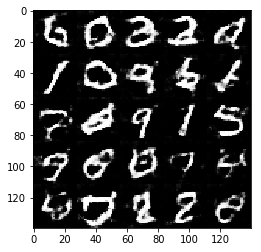

Epoch 2/2... Discriminator Loss: 0.9066... Generator Loss: 1.6648
Epoch 2/2... Discriminator Loss: 0.9511... Generator Loss: 0.9916
Epoch 2/2... Discriminator Loss: 0.8195... Generator Loss: 1.8173
Epoch 2/2... Discriminator Loss: 0.8752... Generator Loss: 1.7993
Epoch 2/2... Discriminator Loss: 0.9256... Generator Loss: 1.0637
Epoch 2/2... Discriminator Loss: 0.8575... Generator Loss: 1.3646
Epoch 2/2... Discriminator Loss: 0.9925... Generator Loss: 0.8448
Epoch 2/2... Discriminator Loss: 0.7337... Generator Loss: 2.0637
Epoch 2/2... Discriminator Loss: 0.8160... Generator Loss: 1.1022
Epoch 2/2... Discriminator Loss: 1.3194... Generator Loss: 0.6108


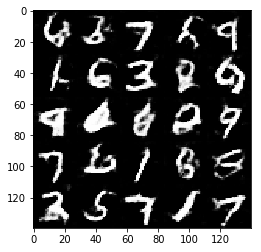

Epoch 2/2... Discriminator Loss: 0.6901... Generator Loss: 1.8041
Epoch 2/2... Discriminator Loss: 0.8140... Generator Loss: 2.1436
Epoch 2/2... Discriminator Loss: 0.8749... Generator Loss: 1.2544
Epoch 2/2... Discriminator Loss: 1.1659... Generator Loss: 0.7006
Epoch 2/2... Discriminator Loss: 1.0202... Generator Loss: 0.8535
Epoch 2/2... Discriminator Loss: 0.8679... Generator Loss: 1.0288
Epoch 2/2... Discriminator Loss: 0.8631... Generator Loss: 1.2299
Epoch 2/2... Discriminator Loss: 0.7084... Generator Loss: 1.5406
Epoch 2/2... Discriminator Loss: 0.9347... Generator Loss: 0.9591
Epoch 2/2... Discriminator Loss: 0.7790... Generator Loss: 2.0290


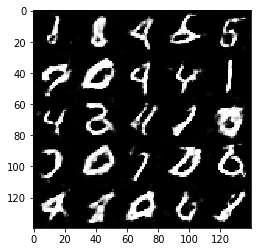

Epoch 2/2... Discriminator Loss: 0.9210... Generator Loss: 0.9658
Epoch 2/2... Discriminator Loss: 0.9300... Generator Loss: 0.9645
Epoch 2/2... Discriminator Loss: 2.8881... Generator Loss: 0.1365
Epoch 2/2... Discriminator Loss: 0.7704... Generator Loss: 1.4830
Epoch 2/2... Discriminator Loss: 0.7908... Generator Loss: 1.2299
Epoch 2/2... Discriminator Loss: 0.8823... Generator Loss: 0.9652
Epoch 2/2... Discriminator Loss: 0.7301... Generator Loss: 1.5385
Epoch 2/2... Discriminator Loss: 0.6630... Generator Loss: 1.7582
Epoch 2/2... Discriminator Loss: 0.9313... Generator Loss: 2.4076
Epoch 2/2... Discriminator Loss: 0.8136... Generator Loss: 1.1223


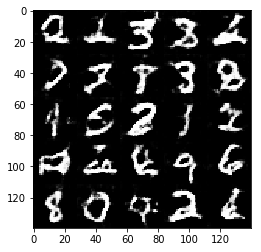

Epoch 2/2... Discriminator Loss: 0.7295... Generator Loss: 1.3767
Epoch 2/2... Discriminator Loss: 1.3650... Generator Loss: 0.5197
Epoch 2/2... Discriminator Loss: 0.8089... Generator Loss: 1.9552
Epoch 2/2... Discriminator Loss: 0.7060... Generator Loss: 1.4918
Epoch 2/2... Discriminator Loss: 0.8502... Generator Loss: 1.1251
Epoch 2/2... Discriminator Loss: 0.7061... Generator Loss: 1.5038
Epoch 2/2... Discriminator Loss: 0.8609... Generator Loss: 1.1441
Epoch 2/2... Discriminator Loss: 0.7882... Generator Loss: 1.3803
Epoch 2/2... Discriminator Loss: 1.2111... Generator Loss: 0.7316
Epoch 2/2... Discriminator Loss: 1.0073... Generator Loss: 0.9951


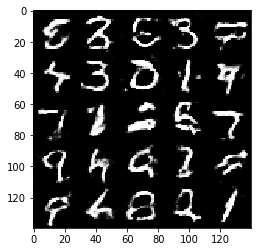

Epoch 2/2... Discriminator Loss: 0.8826... Generator Loss: 1.0200
Epoch 2/2... Discriminator Loss: 0.7337... Generator Loss: 1.4398
Epoch 2/2... Discriminator Loss: 0.6995... Generator Loss: 1.5559
Epoch 2/2... Discriminator Loss: 0.8071... Generator Loss: 1.1975
Epoch 2/2... Discriminator Loss: 0.8174... Generator Loss: 2.0924
Epoch 2/2... Discriminator Loss: 0.8333... Generator Loss: 1.1426
Epoch 2/2... Discriminator Loss: 0.7296... Generator Loss: 1.3801
Epoch 2/2... Discriminator Loss: 0.8001... Generator Loss: 1.2322
Epoch 2/2... Discriminator Loss: 0.6546... Generator Loss: 1.8171
Epoch 2/2... Discriminator Loss: 1.3729... Generator Loss: 0.5486


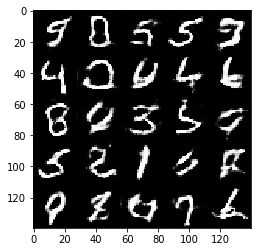

Epoch 2/2... Discriminator Loss: 0.7796... Generator Loss: 1.3554
Epoch 2/2... Discriminator Loss: 0.9450... Generator Loss: 0.9092
Epoch 2/2... Discriminator Loss: 0.7693... Generator Loss: 1.4055
Epoch 2/2... Discriminator Loss: 0.8105... Generator Loss: 1.1818
Epoch 2/2... Discriminator Loss: 0.7434... Generator Loss: 1.4499
Epoch 2/2... Discriminator Loss: 1.3627... Generator Loss: 0.5750
Epoch 2/2... Discriminator Loss: 0.7908... Generator Loss: 1.3150


In [25]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.4327... Generator Loss: 0.9168
Epoch 1/1... Discriminator Loss: 0.7879... Generator Loss: 1.3721
Epoch 1/1... Discriminator Loss: 0.5381... Generator Loss: 2.4130
Epoch 1/1... Discriminator Loss: 0.6172... Generator Loss: 1.7077
Epoch 1/1... Discriminator Loss: 0.4937... Generator Loss: 2.2459
Epoch 1/1... Discriminator Loss: 0.4635... Generator Loss: 2.8792
Epoch 1/1... Discriminator Loss: 0.6312... Generator Loss: 1.6163
Epoch 1/1... Discriminator Loss: 0.5150... Generator Loss: 4.7152
Epoch 1/1... Discriminator Loss: 1.1666... Generator Loss: 0.6358
Epoch 1/1... Discriminator Loss: 0.5865... Generator Loss: 3.0401


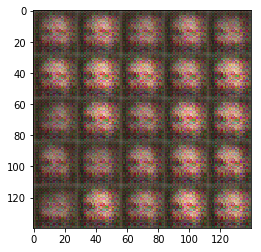

Epoch 1/1... Discriminator Loss: 0.5309... Generator Loss: 4.1279
Epoch 1/1... Discriminator Loss: 0.8401... Generator Loss: 5.0542
Epoch 1/1... Discriminator Loss: 0.7273... Generator Loss: 1.4755
Epoch 1/1... Discriminator Loss: 0.7977... Generator Loss: 1.2034
Epoch 1/1... Discriminator Loss: 0.7312... Generator Loss: 1.5372
Epoch 1/1... Discriminator Loss: 0.6465... Generator Loss: 2.6969
Epoch 1/1... Discriminator Loss: 0.7031... Generator Loss: 1.5111
Epoch 1/1... Discriminator Loss: 0.9077... Generator Loss: 4.7213
Epoch 1/1... Discriminator Loss: 0.6692... Generator Loss: 2.3305
Epoch 1/1... Discriminator Loss: 0.6418... Generator Loss: 2.9646


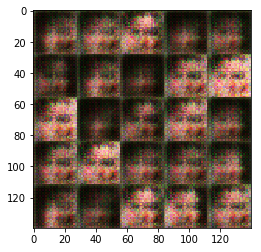

Epoch 1/1... Discriminator Loss: 0.5158... Generator Loss: 2.7597
Epoch 1/1... Discriminator Loss: 0.8370... Generator Loss: 1.1778
Epoch 1/1... Discriminator Loss: 0.8304... Generator Loss: 2.0611
Epoch 1/1... Discriminator Loss: 0.6108... Generator Loss: 1.9871
Epoch 1/1... Discriminator Loss: 0.7010... Generator Loss: 1.5029
Epoch 1/1... Discriminator Loss: 0.5392... Generator Loss: 2.2331
Epoch 1/1... Discriminator Loss: 0.7934... Generator Loss: 1.7709
Epoch 1/1... Discriminator Loss: 0.8322... Generator Loss: 2.5713
Epoch 1/1... Discriminator Loss: 0.8699... Generator Loss: 1.6503
Epoch 1/1... Discriminator Loss: 1.0364... Generator Loss: 1.0074


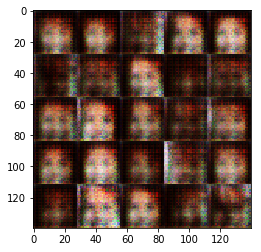

Epoch 1/1... Discriminator Loss: 0.7716... Generator Loss: 1.8701
Epoch 1/1... Discriminator Loss: 0.8824... Generator Loss: 1.7099
Epoch 1/1... Discriminator Loss: 0.8247... Generator Loss: 1.5987
Epoch 1/1... Discriminator Loss: 0.6589... Generator Loss: 2.8054
Epoch 1/1... Discriminator Loss: 0.8120... Generator Loss: 1.6723
Epoch 1/1... Discriminator Loss: 1.1846... Generator Loss: 0.9566
Epoch 1/1... Discriminator Loss: 1.0352... Generator Loss: 1.2347
Epoch 1/1... Discriminator Loss: 0.9167... Generator Loss: 1.2086
Epoch 1/1... Discriminator Loss: 1.1987... Generator Loss: 2.0016
Epoch 1/1... Discriminator Loss: 1.1171... Generator Loss: 1.3515


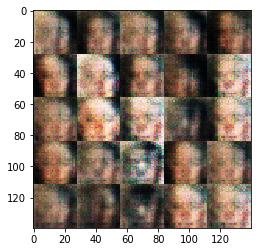

Epoch 1/1... Discriminator Loss: 0.7733... Generator Loss: 2.1136
Epoch 1/1... Discriminator Loss: 1.0628... Generator Loss: 1.0375
Epoch 1/1... Discriminator Loss: 1.1642... Generator Loss: 0.9468
Epoch 1/1... Discriminator Loss: 0.7672... Generator Loss: 1.7001
Epoch 1/1... Discriminator Loss: 0.7764... Generator Loss: 2.4143
Epoch 1/1... Discriminator Loss: 0.7959... Generator Loss: 1.6308
Epoch 1/1... Discriminator Loss: 1.1443... Generator Loss: 1.5554
Epoch 1/1... Discriminator Loss: 0.7384... Generator Loss: 1.5845
Epoch 1/1... Discriminator Loss: 0.7999... Generator Loss: 1.6471
Epoch 1/1... Discriminator Loss: 0.8393... Generator Loss: 1.5871


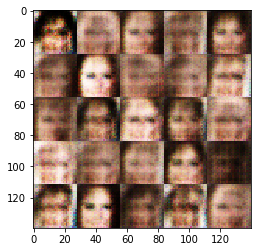

Epoch 1/1... Discriminator Loss: 0.9821... Generator Loss: 1.4537
Epoch 1/1... Discriminator Loss: 1.3905... Generator Loss: 1.3343
Epoch 1/1... Discriminator Loss: 0.9266... Generator Loss: 1.1725
Epoch 1/1... Discriminator Loss: 0.8820... Generator Loss: 1.2544
Epoch 1/1... Discriminator Loss: 1.0681... Generator Loss: 1.9134
Epoch 1/1... Discriminator Loss: 1.0721... Generator Loss: 1.3567
Epoch 1/1... Discriminator Loss: 1.0956... Generator Loss: 1.9408
Epoch 1/1... Discriminator Loss: 0.9872... Generator Loss: 1.1443
Epoch 1/1... Discriminator Loss: 0.8303... Generator Loss: 1.7782
Epoch 1/1... Discriminator Loss: 0.8066... Generator Loss: 1.5482


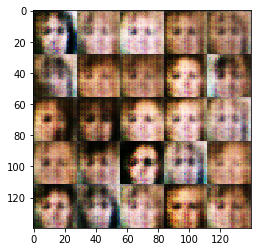

Epoch 1/1... Discriminator Loss: 0.9267... Generator Loss: 1.3155
Epoch 1/1... Discriminator Loss: 0.7915... Generator Loss: 1.6028
Epoch 1/1... Discriminator Loss: 0.9058... Generator Loss: 1.3011
Epoch 1/1... Discriminator Loss: 1.2505... Generator Loss: 0.6599
Epoch 1/1... Discriminator Loss: 0.6889... Generator Loss: 2.0649
Epoch 1/1... Discriminator Loss: 0.9119... Generator Loss: 1.4707
Epoch 1/1... Discriminator Loss: 1.1206... Generator Loss: 0.7861
Epoch 1/1... Discriminator Loss: 0.9325... Generator Loss: 1.2141
Epoch 1/1... Discriminator Loss: 0.8302... Generator Loss: 1.3261
Epoch 1/1... Discriminator Loss: 0.9625... Generator Loss: 1.2348


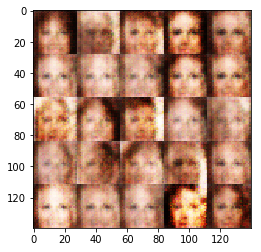

Epoch 1/1... Discriminator Loss: 0.7651... Generator Loss: 1.5358
Epoch 1/1... Discriminator Loss: 0.6776... Generator Loss: 2.1456
Epoch 1/1... Discriminator Loss: 0.9227... Generator Loss: 2.2369
Epoch 1/1... Discriminator Loss: 0.8947... Generator Loss: 2.2466
Epoch 1/1... Discriminator Loss: 0.9608... Generator Loss: 1.7310
Epoch 1/1... Discriminator Loss: 1.1505... Generator Loss: 1.9562
Epoch 1/1... Discriminator Loss: 0.8657... Generator Loss: 1.7415
Epoch 1/1... Discriminator Loss: 0.7788... Generator Loss: 1.5523
Epoch 1/1... Discriminator Loss: 0.9791... Generator Loss: 1.5280
Epoch 1/1... Discriminator Loss: 0.8337... Generator Loss: 1.3696


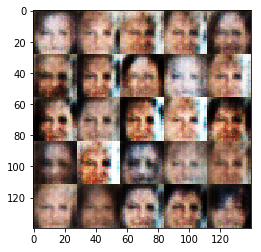

Epoch 1/1... Discriminator Loss: 0.9218... Generator Loss: 1.2139
Epoch 1/1... Discriminator Loss: 0.9335... Generator Loss: 1.2868
Epoch 1/1... Discriminator Loss: 1.0112... Generator Loss: 1.0303
Epoch 1/1... Discriminator Loss: 0.9382... Generator Loss: 1.1644
Epoch 1/1... Discriminator Loss: 0.9711... Generator Loss: 1.5836
Epoch 1/1... Discriminator Loss: 0.8861... Generator Loss: 1.0779
Epoch 1/1... Discriminator Loss: 1.2232... Generator Loss: 0.7743
Epoch 1/1... Discriminator Loss: 0.8484... Generator Loss: 1.5058
Epoch 1/1... Discriminator Loss: 0.8959... Generator Loss: 1.3123
Epoch 1/1... Discriminator Loss: 0.8015... Generator Loss: 1.6151


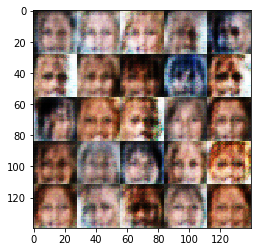

Epoch 1/1... Discriminator Loss: 1.0658... Generator Loss: 1.0380
Epoch 1/1... Discriminator Loss: 0.9416... Generator Loss: 1.3672
Epoch 1/1... Discriminator Loss: 0.9071... Generator Loss: 1.3387
Epoch 1/1... Discriminator Loss: 1.0325... Generator Loss: 1.2617
Epoch 1/1... Discriminator Loss: 0.8859... Generator Loss: 1.2592
Epoch 1/1... Discriminator Loss: 1.6426... Generator Loss: 2.9751
Epoch 1/1... Discriminator Loss: 1.0373... Generator Loss: 0.9303
Epoch 1/1... Discriminator Loss: 1.1725... Generator Loss: 0.7728
Epoch 1/1... Discriminator Loss: 0.9568... Generator Loss: 1.6320
Epoch 1/1... Discriminator Loss: 0.8514... Generator Loss: 1.9130


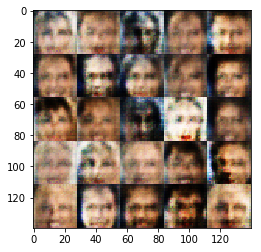

Epoch 1/1... Discriminator Loss: 0.8803... Generator Loss: 1.6521
Epoch 1/1... Discriminator Loss: 1.1570... Generator Loss: 1.1265
Epoch 1/1... Discriminator Loss: 1.0861... Generator Loss: 0.9844
Epoch 1/1... Discriminator Loss: 0.9916... Generator Loss: 1.2226
Epoch 1/1... Discriminator Loss: 1.0100... Generator Loss: 1.2708
Epoch 1/1... Discriminator Loss: 1.1202... Generator Loss: 1.1892
Epoch 1/1... Discriminator Loss: 1.0218... Generator Loss: 1.1291
Epoch 1/1... Discriminator Loss: 1.0682... Generator Loss: 0.8721
Epoch 1/1... Discriminator Loss: 1.0941... Generator Loss: 1.0844
Epoch 1/1... Discriminator Loss: 1.0447... Generator Loss: 0.9513


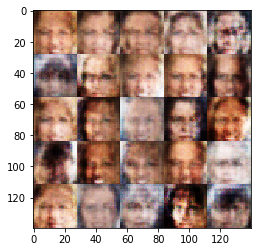

Epoch 1/1... Discriminator Loss: 1.1352... Generator Loss: 1.6846
Epoch 1/1... Discriminator Loss: 1.0898... Generator Loss: 1.7675
Epoch 1/1... Discriminator Loss: 1.0271... Generator Loss: 1.6025
Epoch 1/1... Discriminator Loss: 0.8285... Generator Loss: 1.6672
Epoch 1/1... Discriminator Loss: 1.0068... Generator Loss: 1.3719
Epoch 1/1... Discriminator Loss: 1.0632... Generator Loss: 1.2584
Epoch 1/1... Discriminator Loss: 1.0360... Generator Loss: 1.0984
Epoch 1/1... Discriminator Loss: 1.2334... Generator Loss: 1.5790
Epoch 1/1... Discriminator Loss: 1.1285... Generator Loss: 0.8710
Epoch 1/1... Discriminator Loss: 0.8426... Generator Loss: 1.4065


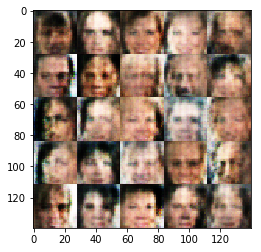

Epoch 1/1... Discriminator Loss: 0.9784... Generator Loss: 1.2987
Epoch 1/1... Discriminator Loss: 0.8328... Generator Loss: 1.6760
Epoch 1/1... Discriminator Loss: 0.9414... Generator Loss: 1.4440
Epoch 1/1... Discriminator Loss: 0.9431... Generator Loss: 1.4372
Epoch 1/1... Discriminator Loss: 1.0594... Generator Loss: 0.9691
Epoch 1/1... Discriminator Loss: 0.9921... Generator Loss: 1.2940
Epoch 1/1... Discriminator Loss: 1.2907... Generator Loss: 0.6671
Epoch 1/1... Discriminator Loss: 1.0119... Generator Loss: 1.2479
Epoch 1/1... Discriminator Loss: 1.0646... Generator Loss: 1.0225
Epoch 1/1... Discriminator Loss: 0.9992... Generator Loss: 1.1744


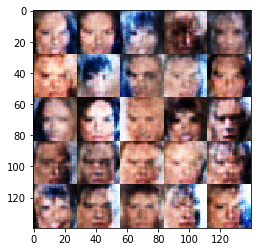

Epoch 1/1... Discriminator Loss: 1.0133... Generator Loss: 1.4787
Epoch 1/1... Discriminator Loss: 0.9686... Generator Loss: 1.5174
Epoch 1/1... Discriminator Loss: 1.1193... Generator Loss: 0.9585
Epoch 1/1... Discriminator Loss: 1.0145... Generator Loss: 2.1484
Epoch 1/1... Discriminator Loss: 1.0010... Generator Loss: 1.3228
Epoch 1/1... Discriminator Loss: 0.9818... Generator Loss: 1.1140
Epoch 1/1... Discriminator Loss: 1.0584... Generator Loss: 1.7846
Epoch 1/1... Discriminator Loss: 1.1496... Generator Loss: 1.5985
Epoch 1/1... Discriminator Loss: 0.8898... Generator Loss: 1.9303
Epoch 1/1... Discriminator Loss: 0.9910... Generator Loss: 1.0316


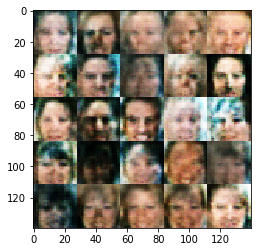

Epoch 1/1... Discriminator Loss: 0.9981... Generator Loss: 1.5486
Epoch 1/1... Discriminator Loss: 0.8437... Generator Loss: 1.3983
Epoch 1/1... Discriminator Loss: 0.9447... Generator Loss: 1.2570
Epoch 1/1... Discriminator Loss: 0.9146... Generator Loss: 1.1680
Epoch 1/1... Discriminator Loss: 1.0695... Generator Loss: 0.9427
Epoch 1/1... Discriminator Loss: 0.9718... Generator Loss: 1.4937
Epoch 1/1... Discriminator Loss: 1.0427... Generator Loss: 0.9774
Epoch 1/1... Discriminator Loss: 1.1130... Generator Loss: 0.9836
Epoch 1/1... Discriminator Loss: 1.0744... Generator Loss: 1.9649
Epoch 1/1... Discriminator Loss: 1.1585... Generator Loss: 0.9724


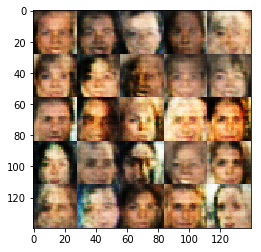

Epoch 1/1... Discriminator Loss: 1.1950... Generator Loss: 0.7884
Epoch 1/1... Discriminator Loss: 0.9881... Generator Loss: 1.2236
Epoch 1/1... Discriminator Loss: 0.9096... Generator Loss: 1.8564
Epoch 1/1... Discriminator Loss: 0.8907... Generator Loss: 2.0732
Epoch 1/1... Discriminator Loss: 1.3238... Generator Loss: 0.6468
Epoch 1/1... Discriminator Loss: 1.0128... Generator Loss: 1.2793
Epoch 1/1... Discriminator Loss: 1.0257... Generator Loss: 1.3153
Epoch 1/1... Discriminator Loss: 1.0097... Generator Loss: 1.0291
Epoch 1/1... Discriminator Loss: 0.9050... Generator Loss: 1.4502
Epoch 1/1... Discriminator Loss: 1.0250... Generator Loss: 1.1072


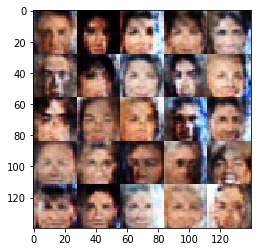

Epoch 1/1... Discriminator Loss: 1.1318... Generator Loss: 1.1892
Epoch 1/1... Discriminator Loss: 0.9288... Generator Loss: 1.1194
Epoch 1/1... Discriminator Loss: 1.0496... Generator Loss: 1.0509
Epoch 1/1... Discriminator Loss: 1.1176... Generator Loss: 1.4001
Epoch 1/1... Discriminator Loss: 1.0711... Generator Loss: 1.5518
Epoch 1/1... Discriminator Loss: 1.2576... Generator Loss: 0.7334
Epoch 1/1... Discriminator Loss: 0.9269... Generator Loss: 1.2305
Epoch 1/1... Discriminator Loss: 1.0338... Generator Loss: 1.3982
Epoch 1/1... Discriminator Loss: 1.1055... Generator Loss: 0.7954
Epoch 1/1... Discriminator Loss: 1.0305... Generator Loss: 1.3345


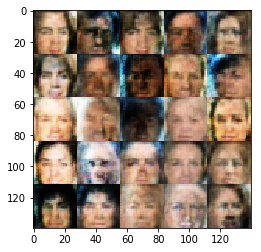

Epoch 1/1... Discriminator Loss: 1.2632... Generator Loss: 0.7071
Epoch 1/1... Discriminator Loss: 1.2936... Generator Loss: 0.7701
Epoch 1/1... Discriminator Loss: 0.9948... Generator Loss: 1.3233
Epoch 1/1... Discriminator Loss: 1.0718... Generator Loss: 1.0317
Epoch 1/1... Discriminator Loss: 1.0488... Generator Loss: 1.2307
Epoch 1/1... Discriminator Loss: 0.9074... Generator Loss: 1.6003
Epoch 1/1... Discriminator Loss: 1.0659... Generator Loss: 1.4882
Epoch 1/1... Discriminator Loss: 1.1228... Generator Loss: 0.9883
Epoch 1/1... Discriminator Loss: 1.4146... Generator Loss: 0.5548
Epoch 1/1... Discriminator Loss: 1.0951... Generator Loss: 1.2125


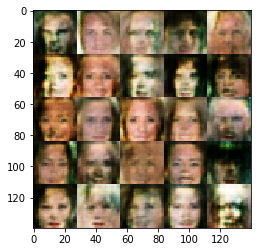

Epoch 1/1... Discriminator Loss: 1.1524... Generator Loss: 0.8028
Epoch 1/1... Discriminator Loss: 0.8731... Generator Loss: 1.6654
Epoch 1/1... Discriminator Loss: 1.0908... Generator Loss: 0.9514
Epoch 1/1... Discriminator Loss: 0.7585... Generator Loss: 1.6859
Epoch 1/1... Discriminator Loss: 0.8845... Generator Loss: 1.4125
Epoch 1/1... Discriminator Loss: 0.9002... Generator Loss: 1.2467
Epoch 1/1... Discriminator Loss: 1.2020... Generator Loss: 1.7279
Epoch 1/1... Discriminator Loss: 1.2449... Generator Loss: 0.7124
Epoch 1/1... Discriminator Loss: 1.0715... Generator Loss: 1.6116
Epoch 1/1... Discriminator Loss: 1.0644... Generator Loss: 0.9522


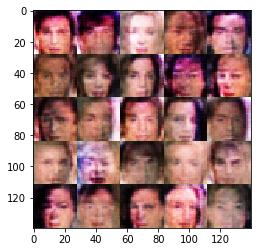

Epoch 1/1... Discriminator Loss: 1.0950... Generator Loss: 0.9413
Epoch 1/1... Discriminator Loss: 1.0409... Generator Loss: 1.0138
Epoch 1/1... Discriminator Loss: 1.2813... Generator Loss: 0.6198
Epoch 1/1... Discriminator Loss: 0.8589... Generator Loss: 1.4341
Epoch 1/1... Discriminator Loss: 1.0419... Generator Loss: 1.6865
Epoch 1/1... Discriminator Loss: 1.1369... Generator Loss: 0.8955
Epoch 1/1... Discriminator Loss: 0.9586... Generator Loss: 1.4464
Epoch 1/1... Discriminator Loss: 1.1603... Generator Loss: 0.9062
Epoch 1/1... Discriminator Loss: 1.1252... Generator Loss: 0.7789
Epoch 1/1... Discriminator Loss: 1.2484... Generator Loss: 0.7502


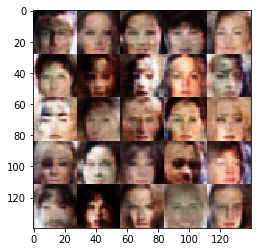

Epoch 1/1... Discriminator Loss: 0.9891... Generator Loss: 1.8676
Epoch 1/1... Discriminator Loss: 1.0757... Generator Loss: 1.0679
Epoch 1/1... Discriminator Loss: 1.1223... Generator Loss: 1.0872
Epoch 1/1... Discriminator Loss: 1.0525... Generator Loss: 1.3079
Epoch 1/1... Discriminator Loss: 0.9868... Generator Loss: 1.1668
Epoch 1/1... Discriminator Loss: 0.9616... Generator Loss: 1.4799
Epoch 1/1... Discriminator Loss: 1.0672... Generator Loss: 1.0728
Epoch 1/1... Discriminator Loss: 0.9082... Generator Loss: 1.3268
Epoch 1/1... Discriminator Loss: 1.0996... Generator Loss: 1.0009
Epoch 1/1... Discriminator Loss: 1.0130... Generator Loss: 1.1029


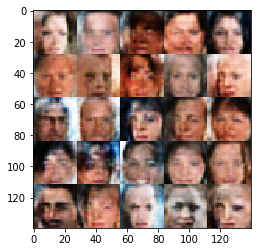

Epoch 1/1... Discriminator Loss: 1.1229... Generator Loss: 0.8471
Epoch 1/1... Discriminator Loss: 1.1111... Generator Loss: 1.7857
Epoch 1/1... Discriminator Loss: 1.0705... Generator Loss: 0.9658
Epoch 1/1... Discriminator Loss: 0.9986... Generator Loss: 1.0421
Epoch 1/1... Discriminator Loss: 1.0682... Generator Loss: 0.8652
Epoch 1/1... Discriminator Loss: 1.3279... Generator Loss: 0.6301
Epoch 1/1... Discriminator Loss: 0.9650... Generator Loss: 1.1439
Epoch 1/1... Discriminator Loss: 0.9996... Generator Loss: 1.0127
Epoch 1/1... Discriminator Loss: 1.0714... Generator Loss: 1.2512
Epoch 1/1... Discriminator Loss: 1.1941... Generator Loss: 0.7787


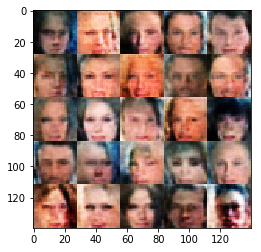

Epoch 1/1... Discriminator Loss: 1.0574... Generator Loss: 1.0856
Epoch 1/1... Discriminator Loss: 1.0362... Generator Loss: 1.4271
Epoch 1/1... Discriminator Loss: 1.2172... Generator Loss: 0.7392
Epoch 1/1... Discriminator Loss: 0.9233... Generator Loss: 1.1577
Epoch 1/1... Discriminator Loss: 1.2924... Generator Loss: 0.6408
Epoch 1/1... Discriminator Loss: 1.0669... Generator Loss: 1.0553
Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 0.8576
Epoch 1/1... Discriminator Loss: 0.8888... Generator Loss: 1.5751
Epoch 1/1... Discriminator Loss: 1.0786... Generator Loss: 1.3848
Epoch 1/1... Discriminator Loss: 1.2221... Generator Loss: 0.6908


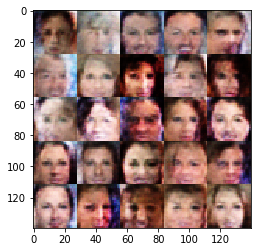

Epoch 1/1... Discriminator Loss: 0.9647... Generator Loss: 1.0239
Epoch 1/1... Discriminator Loss: 0.9881... Generator Loss: 1.0034
Epoch 1/1... Discriminator Loss: 1.0381... Generator Loss: 1.1719
Epoch 1/1... Discriminator Loss: 1.1083... Generator Loss: 1.1070
Epoch 1/1... Discriminator Loss: 0.8928... Generator Loss: 1.4851
Epoch 1/1... Discriminator Loss: 1.1341... Generator Loss: 0.9963
Epoch 1/1... Discriminator Loss: 0.9271... Generator Loss: 1.3009
Epoch 1/1... Discriminator Loss: 1.0739... Generator Loss: 1.4135
Epoch 1/1... Discriminator Loss: 0.9479... Generator Loss: 1.1464
Epoch 1/1... Discriminator Loss: 0.9706... Generator Loss: 1.5040


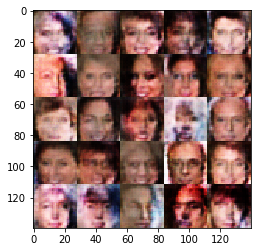

Epoch 1/1... Discriminator Loss: 1.0897... Generator Loss: 1.0522
Epoch 1/1... Discriminator Loss: 1.0059... Generator Loss: 1.6776
Epoch 1/1... Discriminator Loss: 1.2184... Generator Loss: 0.7960
Epoch 1/1... Discriminator Loss: 1.1921... Generator Loss: 0.8552
Epoch 1/1... Discriminator Loss: 1.0565... Generator Loss: 1.1412
Epoch 1/1... Discriminator Loss: 1.0112... Generator Loss: 1.0626
Epoch 1/1... Discriminator Loss: 1.1288... Generator Loss: 0.7876
Epoch 1/1... Discriminator Loss: 1.0225... Generator Loss: 1.1779
Epoch 1/1... Discriminator Loss: 1.2028... Generator Loss: 1.1116
Epoch 1/1... Discriminator Loss: 0.7561... Generator Loss: 2.3256


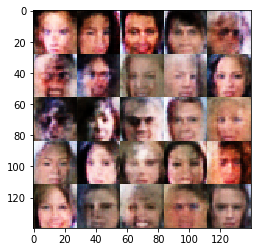

Epoch 1/1... Discriminator Loss: 1.0191... Generator Loss: 1.0960
Epoch 1/1... Discriminator Loss: 1.0887... Generator Loss: 1.0029
Epoch 1/1... Discriminator Loss: 1.0627... Generator Loss: 1.0239
Epoch 1/1... Discriminator Loss: 0.9892... Generator Loss: 1.1233
Epoch 1/1... Discriminator Loss: 1.0441... Generator Loss: 1.0002
Epoch 1/1... Discriminator Loss: 1.1171... Generator Loss: 1.1676
Epoch 1/1... Discriminator Loss: 0.9348... Generator Loss: 1.1992
Epoch 1/1... Discriminator Loss: 1.0840... Generator Loss: 1.3918
Epoch 1/1... Discriminator Loss: 1.2805... Generator Loss: 0.6289
Epoch 1/1... Discriminator Loss: 0.9949... Generator Loss: 1.1784


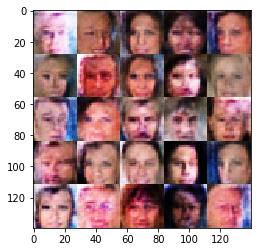

Epoch 1/1... Discriminator Loss: 1.0605... Generator Loss: 1.1931
Epoch 1/1... Discriminator Loss: 0.9412... Generator Loss: 1.2573
Epoch 1/1... Discriminator Loss: 1.8616... Generator Loss: 0.3048
Epoch 1/1... Discriminator Loss: 1.1917... Generator Loss: 1.0776
Epoch 1/1... Discriminator Loss: 0.7721... Generator Loss: 1.7096
Epoch 1/1... Discriminator Loss: 1.0169... Generator Loss: 1.3935
Epoch 1/1... Discriminator Loss: 1.1628... Generator Loss: 1.4725
Epoch 1/1... Discriminator Loss: 1.1400... Generator Loss: 1.2131
Epoch 1/1... Discriminator Loss: 0.9534... Generator Loss: 1.3375
Epoch 1/1... Discriminator Loss: 0.9898... Generator Loss: 1.6411


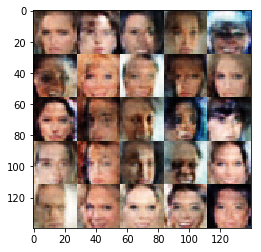

Epoch 1/1... Discriminator Loss: 0.8588... Generator Loss: 1.3152
Epoch 1/1... Discriminator Loss: 0.9482... Generator Loss: 1.1188
Epoch 1/1... Discriminator Loss: 0.7898... Generator Loss: 1.7972
Epoch 1/1... Discriminator Loss: 1.1985... Generator Loss: 0.7328
Epoch 1/1... Discriminator Loss: 1.0076... Generator Loss: 1.3824
Epoch 1/1... Discriminator Loss: 1.1005... Generator Loss: 0.8025
Epoch 1/1... Discriminator Loss: 1.3115... Generator Loss: 0.5916
Epoch 1/1... Discriminator Loss: 1.0020... Generator Loss: 1.7140
Epoch 1/1... Discriminator Loss: 1.4748... Generator Loss: 0.4923
Epoch 1/1... Discriminator Loss: 0.9631... Generator Loss: 1.1954


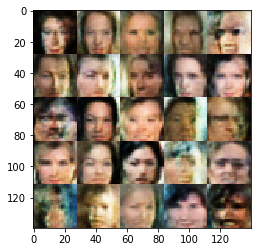

Epoch 1/1... Discriminator Loss: 1.1071... Generator Loss: 0.8310
Epoch 1/1... Discriminator Loss: 1.1290... Generator Loss: 0.7836
Epoch 1/1... Discriminator Loss: 0.8648... Generator Loss: 1.7518
Epoch 1/1... Discriminator Loss: 1.0917... Generator Loss: 1.1950
Epoch 1/1... Discriminator Loss: 1.1506... Generator Loss: 0.8400
Epoch 1/1... Discriminator Loss: 1.0244... Generator Loss: 0.9621
Epoch 1/1... Discriminator Loss: 0.9612... Generator Loss: 1.6278
Epoch 1/1... Discriminator Loss: 1.3028... Generator Loss: 0.7592
Epoch 1/1... Discriminator Loss: 1.2380... Generator Loss: 0.8260
Epoch 1/1... Discriminator Loss: 0.8992... Generator Loss: 1.5128


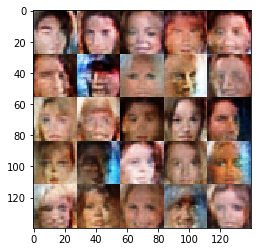

Epoch 1/1... Discriminator Loss: 0.9901... Generator Loss: 1.3790
Epoch 1/1... Discriminator Loss: 0.8817... Generator Loss: 1.3055
Epoch 1/1... Discriminator Loss: 1.0099... Generator Loss: 1.0154
Epoch 1/1... Discriminator Loss: 1.1529... Generator Loss: 0.8579
Epoch 1/1... Discriminator Loss: 0.9436... Generator Loss: 1.5442
Epoch 1/1... Discriminator Loss: 1.1278... Generator Loss: 0.7045
Epoch 1/1... Discriminator Loss: 1.0264... Generator Loss: 1.8591
Epoch 1/1... Discriminator Loss: 1.0414... Generator Loss: 1.3196
Epoch 1/1... Discriminator Loss: 1.0172... Generator Loss: 1.2649
Epoch 1/1... Discriminator Loss: 1.2045... Generator Loss: 0.8005


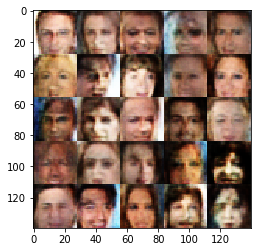

Epoch 1/1... Discriminator Loss: 1.0473... Generator Loss: 0.9020
Epoch 1/1... Discriminator Loss: 1.1558... Generator Loss: 0.8311
Epoch 1/1... Discriminator Loss: 0.9737... Generator Loss: 1.3667
Epoch 1/1... Discriminator Loss: 0.9578... Generator Loss: 1.0887
Epoch 1/1... Discriminator Loss: 0.9889... Generator Loss: 1.3650
Epoch 1/1... Discriminator Loss: 1.0416... Generator Loss: 0.8649
Epoch 1/1... Discriminator Loss: 1.0736... Generator Loss: 0.8215
Epoch 1/1... Discriminator Loss: 1.0312... Generator Loss: 1.3827
Epoch 1/1... Discriminator Loss: 0.9614... Generator Loss: 1.3221
Epoch 1/1... Discriminator Loss: 1.1691... Generator Loss: 1.0107


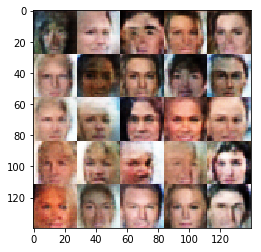

Epoch 1/1... Discriminator Loss: 1.1349... Generator Loss: 0.8940
Epoch 1/1... Discriminator Loss: 0.9070... Generator Loss: 1.6439
Epoch 1/1... Discriminator Loss: 0.9171... Generator Loss: 1.1426
Epoch 1/1... Discriminator Loss: 0.9251... Generator Loss: 1.1744
Epoch 1/1... Discriminator Loss: 1.0648... Generator Loss: 1.1110
Epoch 1/1... Discriminator Loss: 0.9421... Generator Loss: 1.1634


In [26]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.